In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import os as os
from mpl_toolkits.mplot3d import axes3d  


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

header = ["timesteps","is_neutral", "g_through_time", "S_m", "J_m", "speciation_rate", "death_proportion", "trait_rate_meta",	"ecological_strength",
          "intrasp_competition", "intersp_competition", "mutualism_proportion",	"generations", "community_assembly_model", "speciation_model",
          "mutation_rate", "alpha", "sequence_length", "J", "m", "speciation_prob", "generation",  "_lambda", "migrate_calculated",
          "extrate_calculated", "trait_rate_local",	"filtering_optimum", "S", "abund_h1", "abund_h2", "abund_h3", "abund_h4", "pi_h1", "pi_h2",
          "pi_h3", "pi_h4", "mean_pi", "std_pi", "skewness_pi", "kurtosis_pi", "median_pi", "iqr_pi",  "mean_dxys", "std_dxys",
          "skewness_dxys", "kurtosis_dxys",	"median_dxys", "iqr_dxys",	"trees",	"trait_h1",	"trait_h2",	"trait_h3",	"trait_h4",	"mean_local_traits",
          "std_local_traits",	"skewness_local_traits",	"kurtosis_local_traits", "median_local_traits",	"iqr_local_traits",	"mean_regional_traits",
          "std_regional_traits",	"skewness_regional_traits",	"kurtosis_regional_traits",	"median_regional_traits",	"iqr_regional_traits",	"reg_loc_mean_trait_dif",
          "reg_loc_std_trait_dif",	"reg_loc_skewness_trait_dif",	"reg_loc_kurtosis_trait_dif",	"reg_loc_median_trait_dif",	"reg_loc_iqr_trait_dif",	
          "abundance_dxy_cor",	"abundance_pi_cor",	"abundance_trait_cor",	"dxy_pi_cor",	"dxy_trait_cor",	"pi_trait_cor",	"SGD_0",	"SGD_1",	"SGD_2",
          "SGD_3",	"SGD_4", "SGD_5", "SGD_6", "SGD_7", "SGD_8", "SGD_9"]


In [2]:
neutral500, filt500, mean500, pw500 = pd.DataFrame(columns=header), pd.DataFrame(columns=header), pd.DataFrame(columns=header), pd.DataFrame(columns=header)
for folder in os.listdir('./'):
    if os.path.isdir('./'+folder) and folder!=".ipynb_checkpoints":
        text_file = open('./'+folder+"/is_neutral.txt", "r")
        results = text_file.read().split('\n')
        typ = results[-1]
        typ = typ.split('\t')
        typint = []
        for i in range(len(typ)):
            try:
                typint += [float(typ[i])]
            except:
                typint += [typ[i]]
        results = results[:-2]
        results = np.array([[float(j) for j in i.split('\t')] for i in results]).T
        results = results.tolist()
        for i,t in enumerate(typint):
            results += [t]
        d = {header[i]:results[i] for i in range(len(header))}
        res = pd.Series(d, name=str(folder))
        if d["generation"]-500<1:
            filt500 = filt500.append(res)

In [3]:
print(len(filt500))
print(filt500.shape)
print(filt500["generations"])

1995
(1995, 87)
filtering_es-827707343    500.0
filtering_es-399273653    500.0
filtering_es-21992441     500.0
filtering_es-924989770    500.0
filtering_es-883920786    500.0
                          ...  
filtering_es-110869230    500.0
filtering_es-390345610    500.0
filtering_es-842851632    500.0
filtering_es-118689536    500.0
filtering_es-801334412    500.0
Name: generations, Length: 1995, dtype: float64


In [5]:
      
filt1, filt2, filt3, filt4, filt5 = [], [], [], [], []
lda1f, lda2f, lda3f, lda4f, lda5f = [], [], [], [], []
for i in range(len(filt500)):
    if filt500["ecological_strength"][i]<0.004:
        filt1 += [np.mean(filt500["is_neutral"][i][-10:])]
        lda1f += [filt500["_lambda"][i]]
    elif filt500["ecological_strength"][i]<0.04:
        filt2 += [np.mean(filt500["is_neutral"][i][-10:])]
        lda2f += [filt500["_lambda"][i]]
    elif filt500["ecological_strength"][i]<0.4:
        filt3 += [np.mean(filt500["is_neutral"][i][-10:])]
        lda3f += [filt500["_lambda"][i]]
    elif filt500["ecological_strength"][i]<2:
        filt4 += [np.mean(filt500["is_neutral"][i][-10:])]
        lda4f += [filt500["_lambda"][i]]
    else:
        filt5 += [np.mean(filt500["is_neutral"][i][-10:])]
        lda5f += [filt500["_lambda"][i]]

<IPython.core.display.Javascript object>


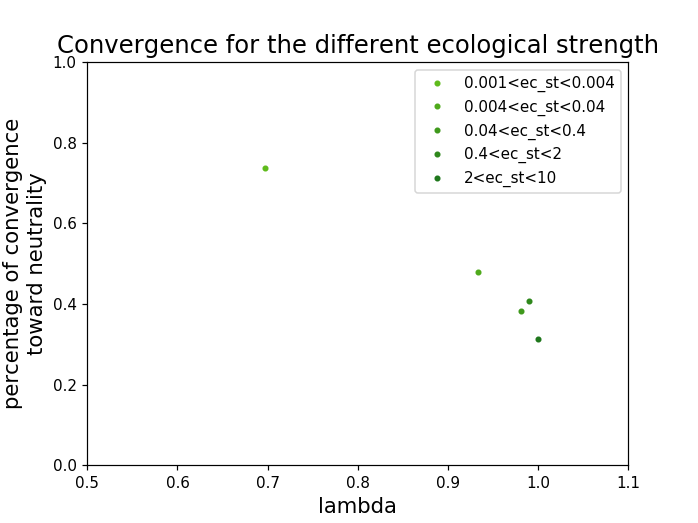

In [8]:
plt.errorbar(np.mean(lda1f), np.mean(filt1), color="#5FBB1C", fmt='.', label="0.001<ec_st<0.004")
plt.errorbar(np.mean(lda2f), np.mean(filt2), color="#4FAA1C", fmt='.', label="0.004<ec_st<0.04")
plt.errorbar(np.mean(lda3f), np.mean(filt3), color="#3F991C", fmt='.', label="0.04<ec_st<0.4")
plt.errorbar(np.mean(lda4f), np.mean(filt4), color="#2F881C", fmt='.', label="0.4<ec_st<2")
plt.errorbar(np.mean(lda5f), np.mean(filt5), color="#1F771C", fmt='.', label="2<ec_st<10")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("lambda",size=14)
plt.title("Convergence for the different ecological strength",size=16)
plt.ylim(0,1)
plt.xlim(0.5,1.1)
plt.legend()
plt.show()

1995
0.00069
125


<IPython.core.display.Javascript object>


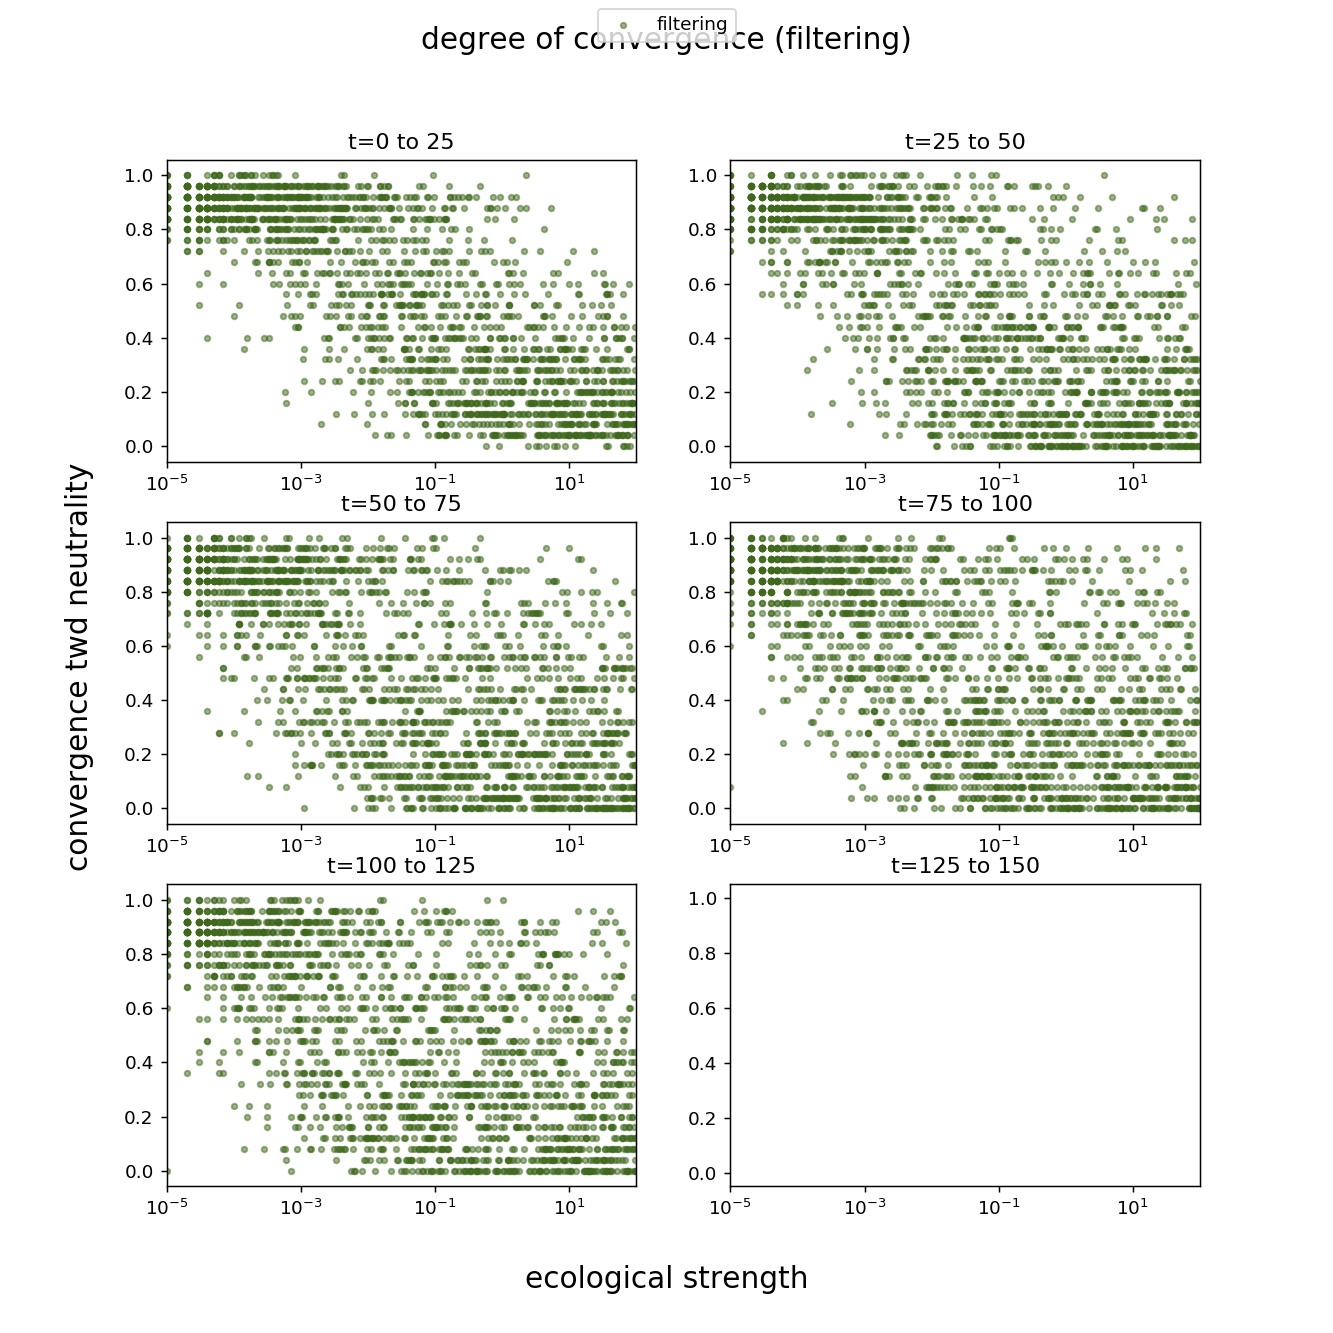

In [30]:
X = filt500["ecological_strength"]
print(len(X))
print(X[0])
print(len(filt500["is_neutral"][0]))

fig, ax = plt.subplots(3, 2, figsize=(10, 10))
axs = fig.axes
for j,ax in enumerate(axs):
    Y = [np.mean(filt500["is_neutral"][i][j*25:(j+1)*25]) for i in range(len(filt500))]
    ax.scatter(X,Y,color="#3F681C", label="filtering", alpha=0.5, marker='.')
    ax.set_xscale('log')
    ax.set_xlim(1e-5,100)
    #ax.set_ylabel('convergence twd neutrality',size=14)
    #ax.set_xlabel('ecological strength',size=14)
    title = "t="+str(j*25)+" to "+str((j+1)*25)
    ax.set_title(title,size=12)
    handles, labels = ax.get_legend_handles_labels()
fig.text(0.5, 0.04, 'ecological strength', ha='center', va='center',size=16)
fig.text(0.06, 0.5, 'convergence twd neutrality', ha='center', va='center', rotation='vertical',size=16)
fig.legend(handles, labels, loc='upper center')
#fig.tight_layout()
fig.suptitle("degree of convergence (filtering)",size=16)
plt.show
plt.savefig('./neutrality_through_time.png')



<IPython.core.display.Javascript object>


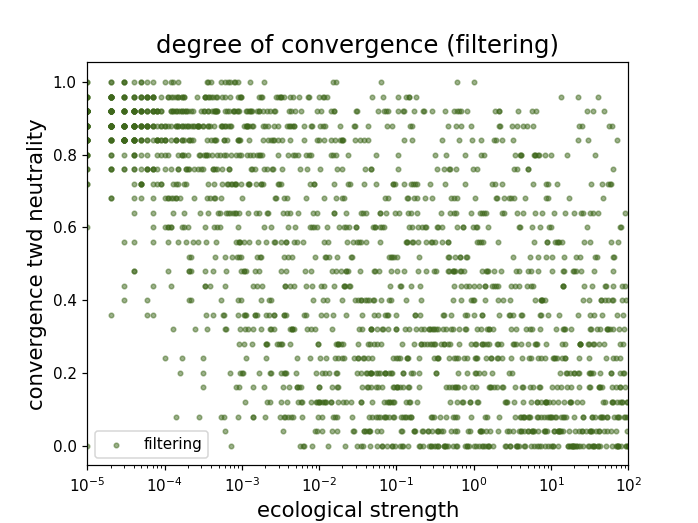

In [10]:
X = filt500["ecological_strength"]
Y = [np.mean(filt500["is_neutral"][i][-25:]) for i in range(len(filt500))]
plt.scatter(X,Y,color="#3F681C", label="filtering", alpha=0.5, marker='.')
plt.xscale('log')
plt.xlim(1e-5,100)
plt.ylabel('convergence twd neutrality',size=14)
plt.xlabel('ecological strength',size=14)
plt.title("degree of convergence (filtering)",size=16)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


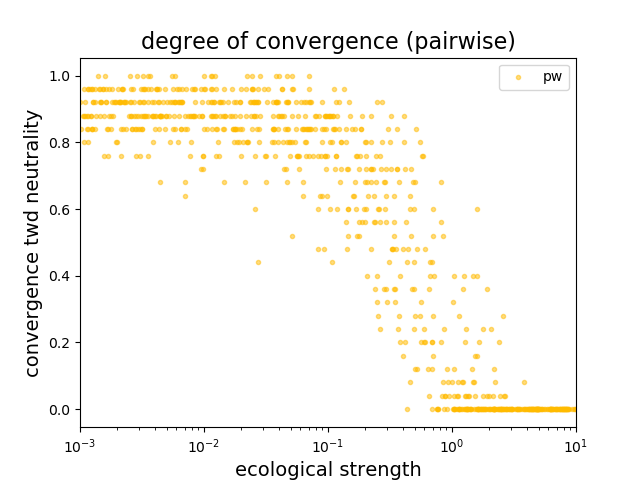

0.001 9.96071


In [19]:

X = [pw500["ecological_strength"] for i in range(len(pw500))]
Y = pw500["g_through_time"]
Z = pw500["is_neutral"]

plt.scatter(X,Y,Y, color="#FFBB00", label="pw", alpha=0.5, marker='.')


#X = neutral500["ecological_strength"]
#Y = [np.mean(neutral500["is_neutral"][i][-25:]) for i in range(len(neutral500))]
#plt.scatter(X,Y,color="#375E97", label="neutral", alpha=0.5, marker='.')

plt.xscale('log')
plt.xlim(1e-3,10)
plt.ylabel('convergence twd neutrality',size=14)
plt.xlabel('ecological strength',size=14)
plt.title("degree of convergence (pairwise)",size=16)
plt.legend()
plt.show()
print(min(X),max(X))

In [20]:
pw1, pw2, pw3, pw4, pw5 = [], [], [], [], []
lda1, lda2, lda3, lda4, lda5 = [], [], [], [], []
sp1, sp2, sp3 = [], [], []
for i in range(len(pw500)):
    if pw500["m"][i]<0.0003:
        pw1 += [np.mean(pw500["is_neutral"][i][-10:])]
        sp1 += [pw500["speciation_prob"][i]]
        lda1 += [pw500["_lambda"][i]]
    elif pw500["m"][i]<0.003:
        pw2 += [np.mean(pw500["is_neutral"][i][-10:])]
        sp2 += [pw500["speciation_prob"][i]]
        lda2 += [pw500["_lambda"][i]]
    elif pw500["m"][i]<0.03:
        pw3 += [np.mean(pw500["is_neutral"][i][-10:])]
        sp3 += [pw500["speciation_prob"][i]]
        lda3 += [pw500["_lambda"][i]]
        
        
mean1, mean2, mean3, mean4, mean5 = [], [], [], [], []
lda1m, lda2m, lda3m, lda4m, lda5m = [], [], [], [], []
sp1m, sp2m, sp3m = [], [], []
for i in range(len(mean500)):
    if mean500["m"][i]<0.0003:
        mean1 += [np.mean(mean500["is_neutral"][i][-10:])]
        sp1m += [mean500["speciation_prob"][i]]
        lda1m += [mean500["_lambda"][i]]
    elif mean500["m"][i]<0.003:
        mean2 += [np.mean(mean500["is_neutral"][i][-10:])]
        sp2m += [mean500["speciation_prob"][i]]
        lda2m += [mean500["_lambda"][i]]
    elif mean500["m"][i]<0.03:
        mean3 += [np.mean(mean500["is_neutral"][i][-10:])]
        sp3m += [mean500["speciation_prob"][i]]
        lda3m += [mean500["_lambda"][i]]
        
        
filt1, filt2, filt3 = [], [], []
lda1f, lda2f, lda3f = [], [], []
sp1f, sp2f, sp3f = [], [], []
for i in range(len(filt500)):
    if filt500["m"][i]<0.0003:
        filt1 += [np.mean(filt500["is_neutral"][i][-10:])]
        sp1f += [filt500["speciation_prob"][i]]
        lda1f += [filt500["_lambda"][i]]
    elif filt500["m"][i]<0.003:
        filt2 += [np.mean(filt500["is_neutral"][i][-10:])]
        sp2f += [filt500["speciation_prob"][i]]
        lda2f += [filt500["_lambda"][i]]
    elif filt500["m"][i]<0.03:
        filt3 += [np.mean(filt500["is_neutral"][i][-10:])]
        sp3f += [filt500["speciation_prob"][i]]
        lda3f += [filt500["_lambda"][i]]


<IPython.core.display.Javascript object>


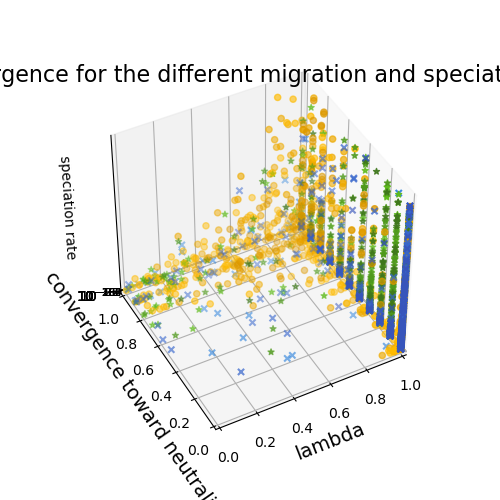

In [24]:
%matplotlib notebook

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(lda1, pw1, sp1, color="#FFBB00", marker='o', label="m<0.0003")
ax.scatter(lda2, pw2, sp2, color="#EEAA00", marker='o', label="m<0.003")
ax.scatter(lda3, pw3, sp3, color="#DD9900", marker='o', label="m<=0.01")

ax.scatter(lda1m, mean1, sp1m, color="#3788DD", marker='x', label="m<0.0003")
ax.scatter(lda2m, mean2, sp2m, color="#3766CC", marker='x', label="m<0.003")
ax.scatter(lda3m, mean3, sp3m, color="#3755BB", marker='x', label="m<=0.01")

ax.scatter(lda1f, filt1, sp1f, color="#5FBB1C", marker='*', label="m<0.0003")
ax.scatter(lda2f, filt2, sp2f, color="#4F991C", marker='*', label="m<0.003")
ax.scatter(lda3f, filt3, sp3f, color="#3F771C", marker='*', label="m<=0.01")

ax.set_ylabel("convergence toward neutrality",size=14)
ax.set_xlabel("lambda",size=14)
ax.set_zlabel("speciation rate")
ax.set_title("Convergence for the different migration and speciation rate",size=16)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_zscale('log')
#plt.legend()
plt.show()



<IPython.core.display.Javascript object>


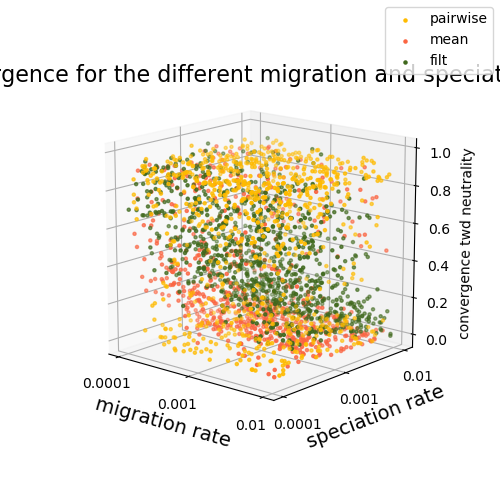

In [28]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.log10(pw500["m"]), np.log10(pw500["speciation_prob"]), [np.mean(pw500["is_neutral"][i]) for i in range(len(pw500))], color="#FFBB00", marker='.', label="pairwise")
ax.scatter(np.log10(mean500["m"]), np.log10(mean500["speciation_prob"]), [np.mean(mean500["is_neutral"][i]) for i in range(len(mean500))], color="#FB6542", marker='.', label="mean")
ax.scatter(np.log10(filt500["m"]), np.log10(filt500["speciation_prob"]), [np.mean(filt500["is_neutral"][i]) for i in range(len(filt500))], color="#3F681C", marker='.', label="filt")
#ax.scatter(np.log10(neutral500["m"]), np.log10(neutral500["speciation_prob"]), [np.mean(neutral500["is_neutral"][i]) for i in range(len(neutral500))], color="#375E97", marker='.', label="neutral")

xticks = [1e-4, 1e-3, 1e-2]
ax.set_xticks(np.log10(xticks))
ax.set_xticklabels(xticks)
yticks = [1e-4, 1e-3, 1e-2]
ax.set_yticks(np.log10(yticks))
ax.set_yticklabels(yticks)

ax.set_xlabel("migration rate",size=14)
ax.set_ylabel("speciation rate",size=14)
ax.set_zlabel("convergence twd neutrality")
ax.set_title("Convergence for the different migration and speciation rate",size=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
fig.legend()
fig.show()

<IPython.core.display.Javascript object>


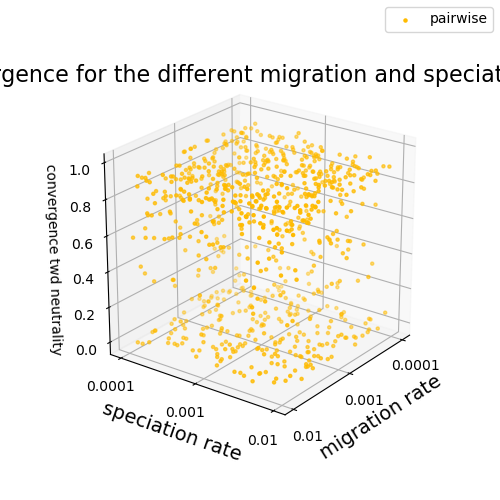

In [47]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.log10(pw500["m"]), np.log10(pw500["speciation_prob"]), pw["_gamma"]) for i in range(len(pw500))], color="#FFBB00", marker='.', label="pairwise")
#ax.scatter(np.log10(mean500["m"]), np.log10(mean500["speciation_prob"]), [np.mean(mean500["is_neutral"][i]) for i in range(len(mean500))], color="#FB6542", marker='.', label="mean")
#ax.scatter(np.log10(filt500["m"]), np.log10(filt500["speciation_prob"]), [np.mean(filt500["is_neutral"][i]) for i in range(len(filt500))], color="#3F681C", marker='.', label="filt")
#ax.scatter(np.log10(neutral500["m"]), np.log10(neutral500["speciation_prob"]), [np.mean(neutral500["is_neutral"][i]) for i in range(len(neutral500))], color="#375E97", marker='.', label="neutral")

xticks = [1e-4, 1e-3, 1e-2]
ax.set_xticks(np.log10(xticks))
ax.set_xticklabels(xticks)
yticks = [1e-4, 1e-3, 1e-2]
ax.set_yticks(np.log10(yticks))
ax.set_yticklabels(yticks)

ax.set_xlabel("migration rate",size=14)
ax.set_ylabel("speciation rate",size=14)
ax.set_zlabel("reached gamma")
ax.set_title("Convergence for the different migration and speciation rate",size=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
fig.legend()
fig.show()

<IPython.core.display.Javascript object>


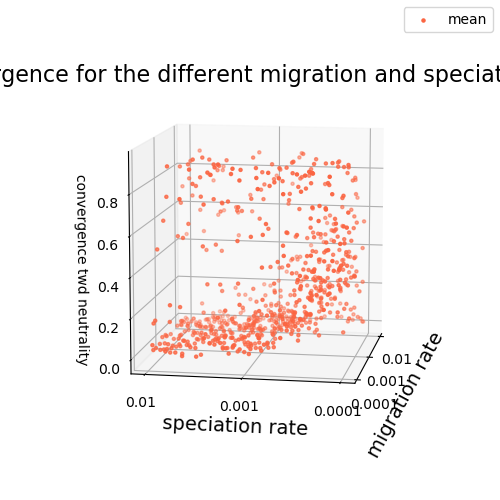

In [46]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(np.log10(pw500["m"]), np.log10(pw500["speciation_prob"]), [np.mean(pw500["is_neutral"][i]) for i in range(len(pw500))], color="#FFBB00", marker='.', label="pairwise")
ax.scatter(np.log10(mean500["m"]), np.log10(mean500["speciation_prob"]), [np.mean(mean500["is_neutral"][i]) for i in range(len(mean500))], color="#FB6542", marker='.', label="mean")
#ax.scatter(np.log10(filt500["m"]), np.log10(filt500["speciation_prob"]), [np.mean(filt500["is_neutral"][i]) for i in range(len(filt500))], color="#3F681C", marker='.', label="filt")
#ax.scatter(np.log10(neutral500["m"]), np.log10(neutral500["speciation_prob"]), [np.mean(neutral500["is_neutral"][i]) for i in range(len(neutral500))], color="#375E97", marker='.', label="neutral")

xticks = [1e-4, 1e-3, 1e-2]
ax.set_xticks(np.log10(xticks))
ax.set_xticklabels(xticks)
yticks = [1e-4, 1e-3, 1e-2]
ax.set_yticks(np.log10(yticks))
ax.set_yticklabels(yticks)

ax.set_xlabel("migration rate",size=14)
ax.set_ylabel("speciation rate",size=14)
ax.set_zlabel("convergence twd neutrality")
ax.set_title("Convergence for the different migration and speciation rate",size=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
fig.legend()
fig.show()

<IPython.core.display.Javascript object>


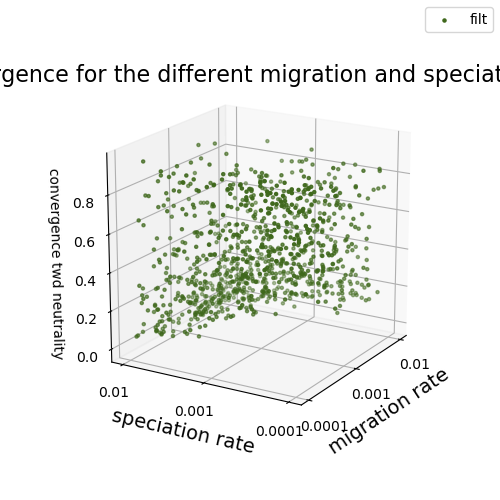

In [45]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(np.log10(pw500["m"]), np.log10(pw500["speciation_prob"]), [np.mean(pw500["is_neutral"][i]) for i in range(len(pw500))], color="#FFBB00", marker='.', label="pairwise")
#ax.scatter(np.log10(mean500["m"]), np.log10(mean500["speciation_prob"]), [np.mean(mean500["is_neutral"][i]) for i in range(len(mean500))], color="#FB6542", marker='.', label="mean")
ax.scatter(np.log10(filt500["m"]), np.log10(filt500["speciation_prob"]), [np.mean(filt500["is_neutral"][i]) for i in range(len(filt500))], color="#3F681C", marker='.', label="filt")
#ax.scatter(np.log10(neutral500["m"]), np.log10(neutral500["speciation_prob"]), [np.mean(neutral500["is_neutral"][i]) for i in range(len(neutral500))], color="#375E97", marker='.', label="neutral")

xticks = [1e-4, 1e-3, 1e-2]
ax.set_xticks(np.log10(xticks))
ax.set_xticklabels(xticks)
yticks = [1e-4, 1e-3, 1e-2]
ax.set_yticks(np.log10(yticks))
ax.set_yticklabels(yticks)

ax.set_xlabel("migration rate",size=14)
ax.set_ylabel("speciation rate",size=14)
ax.set_zlabel("convergence twd neutrality")
ax.set_title("Convergence for the different migration and speciation rate",size=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
fig.legend()
fig.show()

<IPython.core.display.Javascript object>


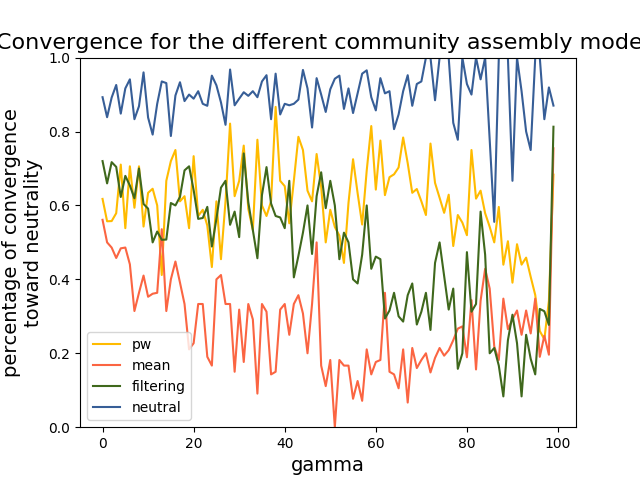

In [92]:
neutr_through_gamma_pw = [[0]]*100
for j, gam in enumerate(pw["g_through_time"]):
    for i,k in enumerate(gam):
        neutr_through_gamma_pw[int(round(k,3)*100)-1] = neutr_through_gamma_pw[int(round(k,3)*100)-1]  + [pw["is_neutral"][j][i]]


neutr_through_gamma_pw = [np.mean(x[1:]) for x in neutr_through_gamma_pw]

neutr_through_gamma_mean = [[0]]*100
for j, gam in enumerate(mean["g_through_time"]):
    for i,k in enumerate(gam):
        neutr_through_gamma_mean[int(round(k,3)*100)-1] = neutr_through_gamma_mean[int(round(k,3)*100)-1]  + [mean["is_neutral"][j][i]]


neutr_through_gamma_mean = [np.mean(x[1:]) for x in neutr_through_gamma_mean]

neutr_through_gamma_filt = [[0]]*100
for j, gam in enumerate(filt["g_through_time"]):
    for i,k in enumerate(gam):
        neutr_through_gamma_filt[int(round(k,3)*100)-1] = neutr_through_gamma_filt[int(round(k,3)*100)-1]  + [filt["is_neutral"][j][i]]


neutr_through_gamma_filt = [np.mean(x[1:]) for x in neutr_through_gamma_filt]

neutr_through_gamma_neu = [[0]]*100
for j, gam in enumerate(neutral["g_through_time"]):
    for i,k in enumerate(gam):
        neutr_through_gamma_neu[int(round(k,3)*100)-1] = neutr_through_gamma_neu[int(round(k,3)*100)-1]  + [neutral["is_neutral"][j][i]]


neutr_through_gamma_neu = [np.mean(x[1:]) for x in neutr_through_gamma_neu]


plt.plot(neutr_through_gamma_pw, color="#FFBB00", label="pw")
plt.plot(neutr_through_gamma_mean, color="#FB6542", label="mean")
plt.plot(neutr_through_gamma_filt, color="#3F681C", label="filtering")
plt.plot(neutr_through_gamma_neu,color="#375E97", label="neutral")
plt.legend()
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("gamma",size=14)
plt.ylim(0,1)
plt.title("Convergence for the different community assembly models",size=16)
plt.show()

<IPython.core.display.Javascript object>


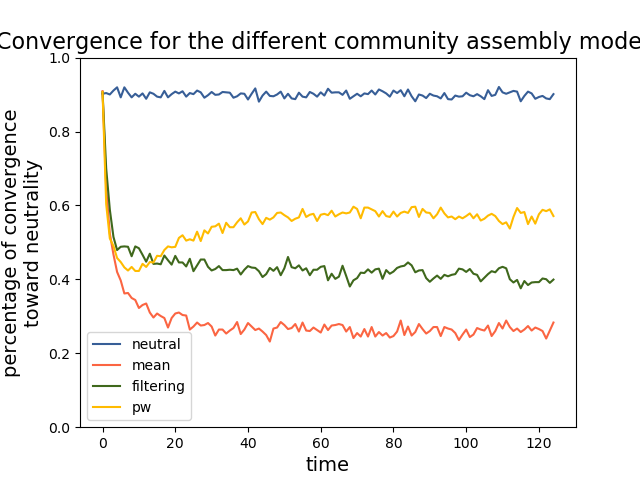

In [29]:
plt.plot(neutral_y500,color="#375E97", label="neutral")
plt.plot(mean_y500, color="#FB6542", label="mean")
plt.plot(filt_y500, color="#3F681C", label="filtering")
plt.plot(pw_y500, color="#FFBB00", label="pw")
plt.legend()
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.ylim(0,1)
plt.title("Convergence for the different community assembly models",size=16)
plt.show()

<IPython.core.display.Javascript object>


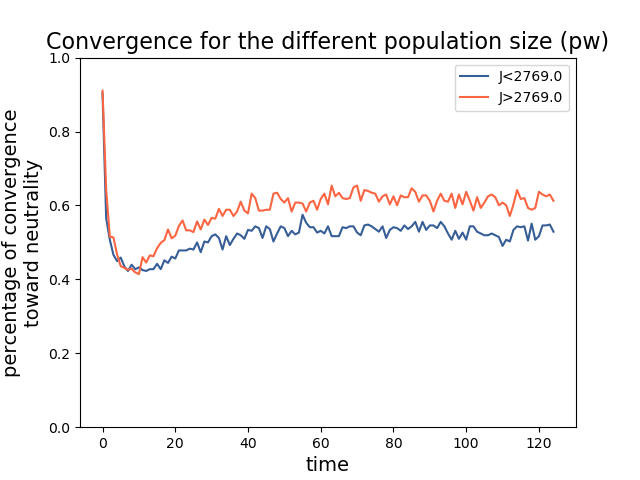

In [30]:
_,bins = pd.qcut(pw500["J"],2, retbins=True)


pw1, pw2, pw3, pw4 = [], [], [], []
for i in range(len(pw500)):
    if pw500["J"][i]<bins[1]:
        pw1 += [pw500["is_neutral"][i]]
    elif pw500["J"][i]<bins[2]:
        pw2 += [pw500["is_neutral"][i]]
   #elif pw500["J"][i]<bins[3]:
   #     pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(pw1,axis=0),color="#375E97", label="J<"+str(bins[1]))
plt.plot(np.mean(pw2,axis=0), color="#FB6542", label="J>"+str(bins[1]))
#plt.plot(np.mean(pw3,axis=0), color="#3F681C", label="J<"+str(bins[3]))
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different population size (pw)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


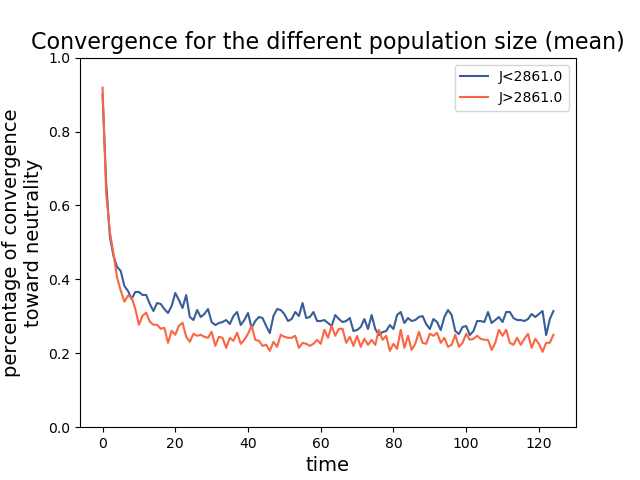

In [31]:
_,bins = pd.qcut(mean500["J"],2, retbins=True)


mean1, mean2, mean3, mean4 = [], [], [], []
for i in range(len(mean500)):
    if mean500["J"][i]<bins[1]:
        mean1 += [mean500["is_neutral"][i]]
    elif mean500["J"][i]<bins[2]:
        mean2 += [mean500["is_neutral"][i]]
   #elif pw500["J"][i]<bins[3]:
   #     pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(mean1,axis=0),color="#375E97", label="J<"+str(bins[1]))
plt.plot(np.mean(mean2,axis=0), color="#FB6542", label="J>"+str(bins[1]))
#plt.plot(np.mean(mean3,axis=0), color="#3F681C", label="J<"+str(bins[3]))
#plt.plot(np.mean(mean4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different population size (mean)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


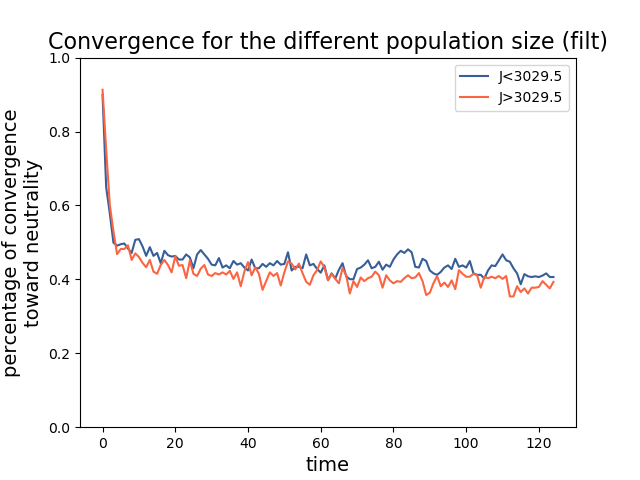

In [32]:
_,bins = pd.qcut(filt500["J"],2, retbins=True)


filt1, filt2, filt3, filt4 = [], [], [], []
for i in range(len(filt500)):
    if filt500["J"][i]<bins[1]:
        filt1 += [filt500["is_neutral"][i]]
    elif filt500["J"][i]<bins[2]:
        filt2 += [filt500["is_neutral"][i]]
   #elif pw500["J"][i]<bins[3]:
   #     pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(filt1,axis=0),color="#375E97", label="J<"+str(bins[1]))
plt.plot(np.mean(filt2,axis=0), color="#FB6542", label="J>"+str(bins[1]))
#plt.plot(np.mean(filt3,axis=0), color="#3F681C", label="J<"+str(bins[3]))
#plt.plot(np.mean(filt4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different population size (filt)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


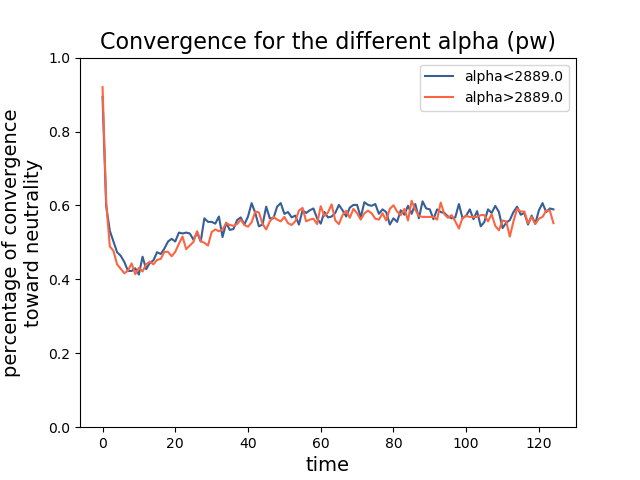

In [33]:
_,bins = pd.qcut(pw500["alpha"],2, retbins=True)


pw1, pw2, pw3, pw4 = [], [], [], []
for i in range(len(pw500)):
    if pw500["alpha"][i]<bins[1]:
        pw1 += [pw500["is_neutral"][i]]
    elif pw500["alpha"][i]<bins[2]:
        pw2 += [pw500["is_neutral"][i]]
   #elif pw500["J"][i]<bins[3]:
   #     pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(pw1,axis=0),color="#375E97", label="alpha<"+str(bins[1]))
plt.plot(np.mean(pw2,axis=0), color="#FB6542", label="alpha>"+str(bins[1]))
#plt.plot(np.mean(pw3,axis=0), color="#3F681C", label="J<"+str(bins[3]))
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.ylim(0,1)
plt.title("Convergence for the different alpha (pw)",size=16)
plt.legend()
plt.show()



<IPython.core.display.Javascript object>


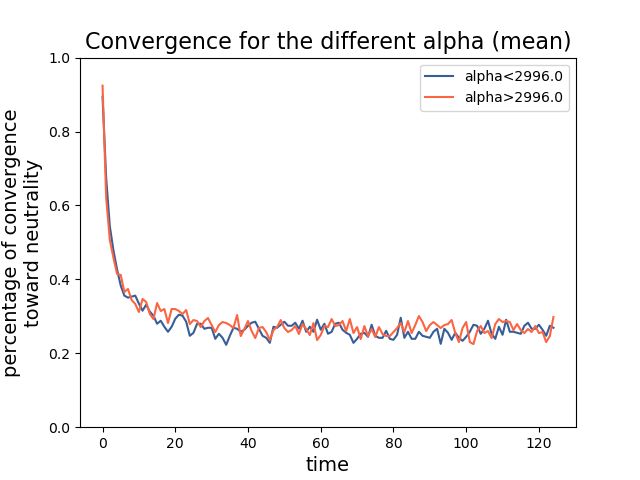

In [34]:
_,bins = pd.qcut(mean500["alpha"],2, retbins=True)


mean1, mean2, mean3, mean4 = [], [], [], []
for i in range(len(mean500)):
    if mean500["alpha"][i]<bins[1]:
        mean1 += [mean500["is_neutral"][i]]
    elif mean500["alpha"][i]<bins[2]:
        mean2 += [mean500["is_neutral"][i]]
   #elif pw500["J"][i]<bins[3]:
   #     pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(mean1,axis=0),color="#375E97", label="alpha<"+str(bins[1]))
plt.plot(np.mean(mean2,axis=0), color="#FB6542", label="alpha>"+str(bins[1]))
#plt.plot(np.mean(mean3,axis=0), color="#3F681C", label="J<"+str(bins[3]))
#plt.plot(np.mean(mean4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different alpha (mean)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()



<IPython.core.display.Javascript object>


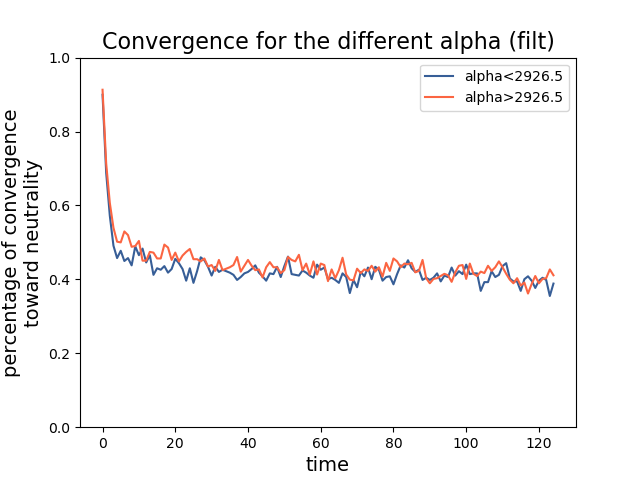

In [35]:
_,bins = pd.qcut(filt500["alpha"],2, retbins=True)


filt1, filt2, filt3, filt4 = [], [], [], []
for i in range(len(filt500)):
    if filt500["alpha"][i]<bins[1]:
        filt1 += [filt500["is_neutral"][i]]
    elif filt500["alpha"][i]<bins[2]:
        filt2 += [filt500["is_neutral"][i]]
   #elif pw500["J"][i]<bins[3]:
   #     pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(filt1,axis=0),color="#375E97", label="alpha<"+str(bins[1]))
plt.plot(np.mean(filt2,axis=0), color="#FB6542", label="alpha>"+str(bins[1]))
#plt.plot(np.mean(filt3,axis=0), color="#3F681C", label="J<"+str(bins[3]))
#plt.plot(np.mean(filt4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different alpha (filt)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()



<IPython.core.display.Javascript object>


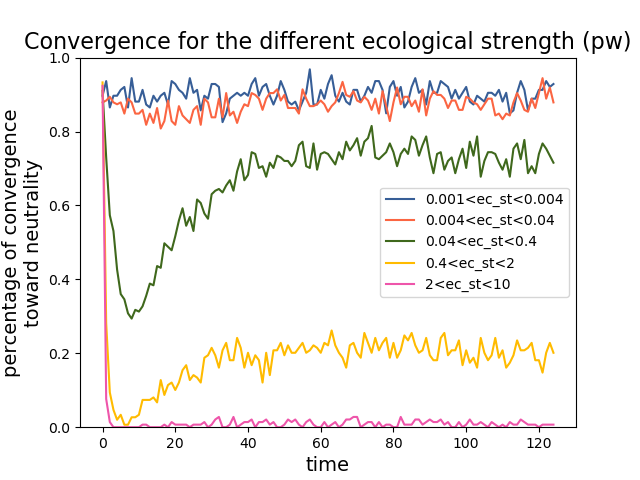

In [36]:
_,bins = pd.qcut(pw500["ecological_strength"],5, retbins=True)


pw1, pw2, pw3, pw4, pw5 = [], [], [], [], []
for i in range(len(pw500)):
    if pw500["ecological_strength"][i]<0.004:
        pw1 += [pw500["is_neutral"][i]]
    elif pw500["ecological_strength"][i]<0.04:
        pw2 += [pw500["is_neutral"][i]]
    elif pw500["ecological_strength"][i]<0.4:
        pw3 += [pw500["is_neutral"][i]]
    elif pw500["ecological_strength"][i]<2:
        pw4 += [pw500["is_neutral"][i]]
    else:
        pw5 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(pw1,axis=0),color="#375E97", label="0.001<ec_st<0.004")
plt.plot(np.mean(pw2,axis=0), color="#FB6542", label="0.004<ec_st<0.04")
plt.plot(np.mean(pw3,axis=0), color="#3F681C", label="0.04<ec_st<0.4")
plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="0.4<ec_st<2")
plt.plot(np.mean(pw5,axis=0), color="#EE55AA", label="2<ec_st<10")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different ecological strength (pw)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


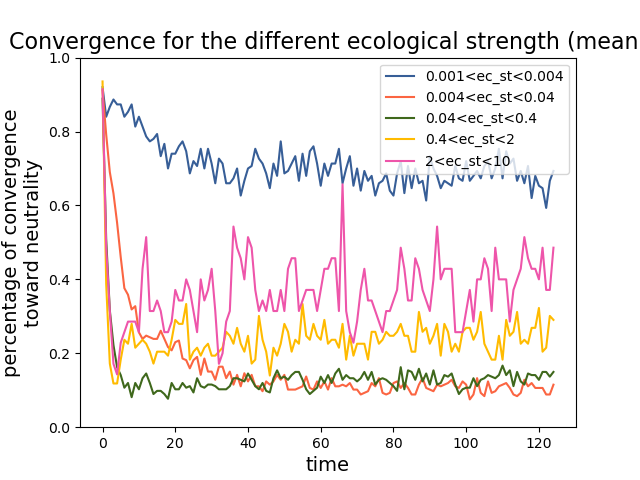

In [37]:
_,bins = pd.qcut(mean500["ecological_strength"],5, retbins=True)


mean1, mean2, mean3, mean4, mean5 = [], [], [], [], []
for i in range(len(mean500)):
    if mean500["ecological_strength"][i]<0.004:
        mean1 += [mean500["is_neutral"][i]]
    elif mean500["ecological_strength"][i]<0.04:
        mean2 += [mean500["is_neutral"][i]]
    elif mean500["ecological_strength"][i]<0.4:
        mean3 += [mean500["is_neutral"][i]]
    elif mean500["ecological_strength"][i]<2:
        mean4 += [mean500["is_neutral"][i]]
    else:
        mean5 += [mean500["is_neutral"][i]]
        
plt.plot(np.mean(mean1,axis=0),color="#375E97", label="0.001<ec_st<0.004")
plt.plot(np.mean(mean2,axis=0), color="#FB6542", label="0.004<ec_st<0.04")
plt.plot(np.mean(mean3,axis=0), color="#3F681C", label="0.04<ec_st<0.4")
plt.plot(np.mean(mean4,axis=0), color="#FFBB00", label="0.4<ec_st<2")
plt.plot(np.mean(mean5,axis=0), color="#EE55AA", label="2<ec_st<10")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different ecological strength (mean)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


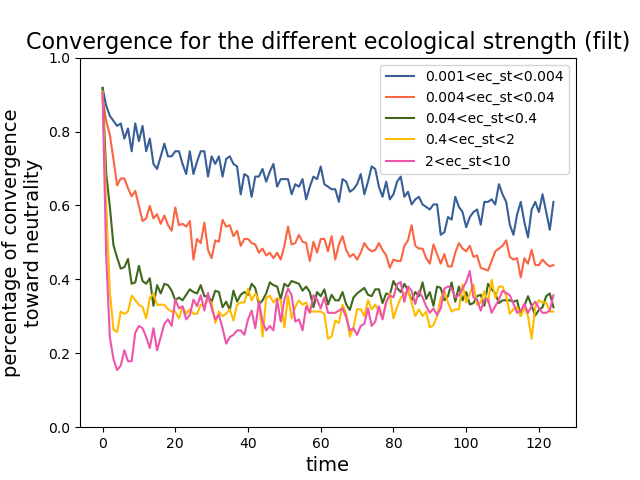

In [38]:
_,bins = pd.qcut(filt500["ecological_strength"],5, retbins=True)


filt1, filt2, filt3, filt4, filt5 = [], [], [], [], []
for i in range(len(filt500)):
    if filt500["ecological_strength"][i]<0.004:
        filt1 += [filt500["is_neutral"][i]]
    elif filt500["ecological_strength"][i]<0.04:
        filt2 += [filt500["is_neutral"][i]]
    elif filt500["ecological_strength"][i]<0.4:
        filt3 += [filt500["is_neutral"][i]]
    elif filt500["ecological_strength"][i]<2:
        filt4 += [filt500["is_neutral"][i]]
    else:
        filt5 += [filt500["is_neutral"][i]]
        
plt.plot(np.mean(filt1,axis=0),color="#375E97", label="0.001<ec_st<0.004")
plt.plot(np.mean(filt2,axis=0), color="#FB6542", label="0.004<ec_st<0.04")
plt.plot(np.mean(filt3,axis=0), color="#3F681C", label="0.04<ec_st<0.4")
plt.plot(np.mean(filt4,axis=0), color="#FFBB00", label="0.4<ec_st<2")
plt.plot(np.mean(filt5,axis=0), color="#EE55AA", label="2<ec_st<10")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different ecological strength (filt)",size=16)
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


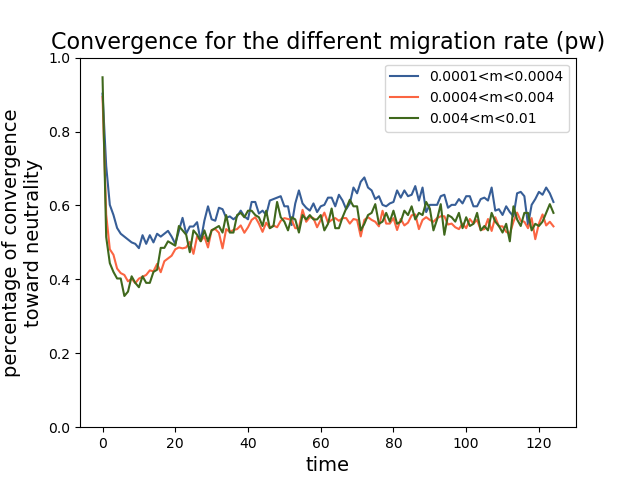

In [39]:
_,bins = pd.qcut(pw500["m"],3, retbins=True)


pw1, pw2, pw3, pw4 = [], [], [], []
for i in range(len(pw500)):
    if pw500["m"][i]<0.0004:
        pw1 += [pw500["is_neutral"][i]]
    elif pw500["m"][i]<0.004:
        pw2 += [pw500["is_neutral"][i]]
    elif pw500["m"][i]<0.04:
        pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(pw1,axis=0),color="#375E97", label="0.0001<m<0.0004")
plt.plot(np.mean(pw2,axis=0), color="#FB6542", label="0.0004<m<0.004")
plt.plot(np.mean(pw3,axis=0), color="#3F681C", label="0.004<m<0.01")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different migration rate (pw)",size=16)
plt.ylim(0,1)
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


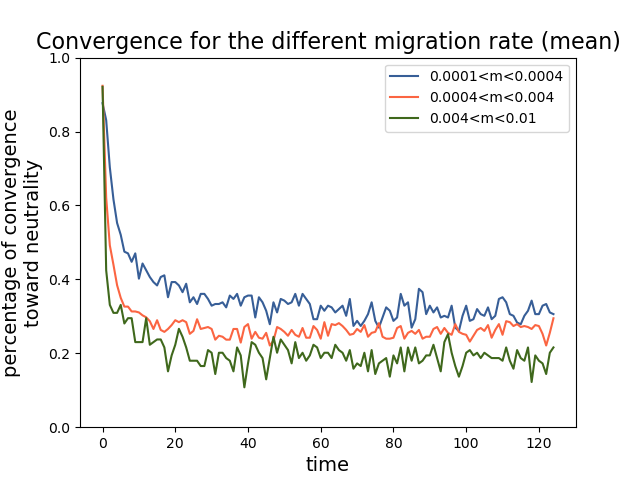

In [40]:
_,bins = pd.qcut(mean500["m"],3, retbins=True)


mean1, mean2, mean3, mean4 = [], [], [], []
for i in range(len(mean500)):
    if mean500["m"][i]<0.0004:
        mean1 += [mean500["is_neutral"][i]]
    elif mean500["m"][i]<0.004:
        mean2 += [mean500["is_neutral"][i]]
    elif mean500["m"][i]<0.04:
        mean3 += [mean500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(mean1,axis=0),color="#375E97", label="0.0001<m<0.0004")
plt.plot(np.mean(mean2,axis=0), color="#FB6542", label="0.0004<m<0.004")
plt.plot(np.mean(mean3,axis=0), color="#3F681C", label="0.004<m<0.01")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different migration rate (mean)",size=16)
plt.ylim(0,1)
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


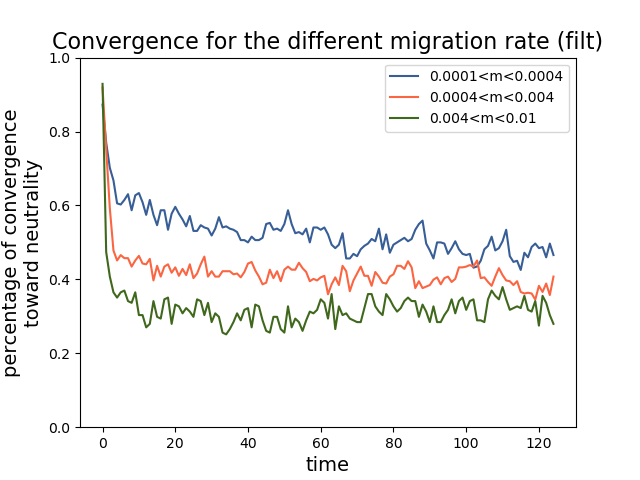

In [41]:
_,bins = pd.qcut(filt500["m"],3, retbins=True)


filt1, filt2, filt3, filt4 = [], [], [], []
for i in range(len(filt500)):
    if filt500["m"][i]<0.0004:
        filt1 += [filt500["is_neutral"][i]]
    elif filt500["m"][i]<0.004:
        filt2 += [filt500["is_neutral"][i]]
    elif filt500["m"][i]<0.04:
        filt3 += [filt500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(filt1,axis=0),color="#375E97", label="0.0001<m<0.0004")
plt.plot(np.mean(filt2,axis=0), color="#FB6542", label="0.0004<m<0.004")
plt.plot(np.mean(filt3,axis=0), color="#3F681C", label="0.004<m<0.01")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different migration rate (filt)",size=16)
plt.ylim(0,1)
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


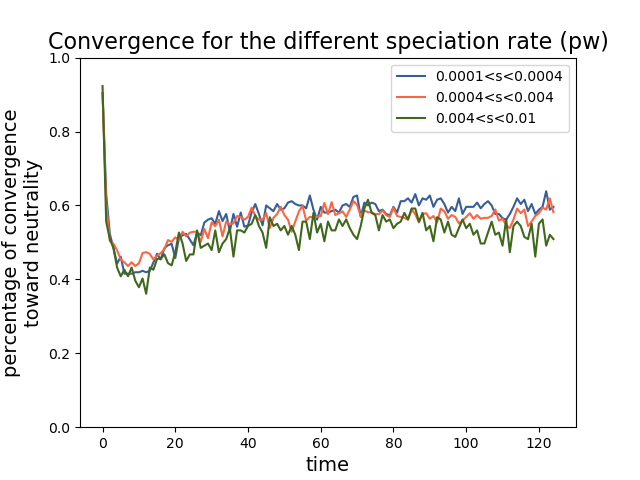

In [42]:
_,bins = pd.qcut(pw500["speciation_prob"],3, retbins=True)


pw1, pw2, pw3, pw4 = [], [], [], []
for i in range(len(pw500)):
    if pw500["speciation_prob"][i]<0.0004:
        pw1 += [pw500["is_neutral"][i]]
    elif pw500["speciation_prob"][i]<0.004:
        pw2 += [pw500["is_neutral"][i]]
    elif pw500["speciation_prob"][i]<0.04:
        pw3 += [pw500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(pw1,axis=0),color="#375E97", label="0.0001<s<0.0004")
plt.plot(np.mean(pw2,axis=0), color="#FB6542", label="0.0004<s<0.004")
plt.plot(np.mean(pw3,axis=0), color="#3F681C", label="0.004<s<0.01")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different speciation rate (pw)",size=16)
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


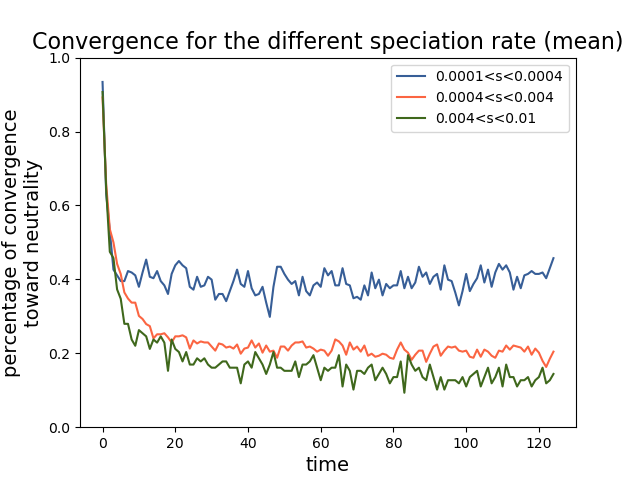

In [43]:
_,bins = pd.qcut(mean500["speciation_prob"],3, retbins=True)


mean1, mean2, mean3, mean4 = [], [], [], []
for i in range(len(mean500)):
    if mean500["speciation_prob"][i]<0.0004:
        mean1 += [mean500["is_neutral"][i]]
    elif mean500["speciation_prob"][i]<0.004:
        mean2 += [mean500["is_neutral"][i]]
    elif mean500["speciation_prob"][i]<0.04:
        mean3 += [mean500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(mean1,axis=0),color="#375E97", label="0.0001<s<0.0004")
plt.plot(np.mean(mean2,axis=0), color="#FB6542", label="0.0004<s<0.004")
plt.plot(np.mean(mean3,axis=0), color="#3F681C", label="0.004<s<0.01")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different speciation rate (mean)",size=16)
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylim(0,1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


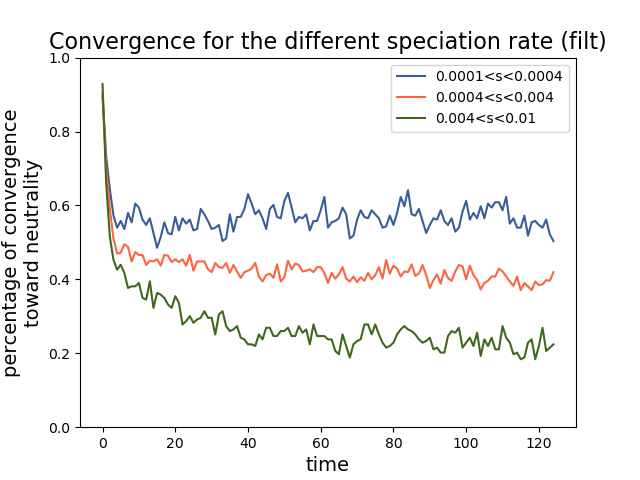

In [44]:
_,bins = pd.qcut(filt500["speciation_prob"],3, retbins=True)


filt1, filt2, filt3, filt4 = [], [], [], []
for i in range(len(filt500)):
    if filt500["speciation_prob"][i]<0.0004:
        filt1 += [filt500["is_neutral"][i]]
    elif filt500["speciation_prob"][i]<0.004:
        filt2 += [filt500["is_neutral"][i]]
    elif filt500["speciation_prob"][i]<0.04:
        filt3 += [filt500["is_neutral"][i]]
   # else:
   #     pw4 += [pw500["is_neutral"][i]]
        
plt.plot(np.mean(filt1,axis=0),color="#375E97", label="0.0001<s<0.0004")
plt.plot(np.mean(filt2,axis=0), color="#FB6542", label="0.0004<s<0.004")
plt.plot(np.mean(filt3,axis=0), color="#3F681C", label="0.004<s<0.01")
plt.ylabel("percentage of convergence\ntoward neutrality",size=14)
plt.xlabel("time",size=14)
plt.title("Convergence for the different speciation rate (filt)",size=16)
#plt.plot(np.mean(pw4,axis=0), color="#FFBB00", label="J<"+str(bins[4]))
plt.ylim(0,1)
plt.legend()
plt.show()